Keras Regression Code Along Project
Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 720x504 with 0 Axes>

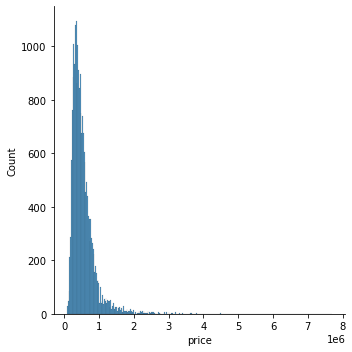

In [8]:
plt.figure(figsize = (10,7))
sns.displot(df['price'])

/home/bipro/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

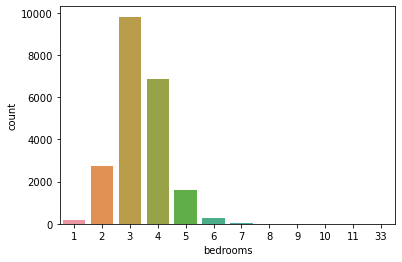

In [9]:
sns.countplot(df['bedrooms'])

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

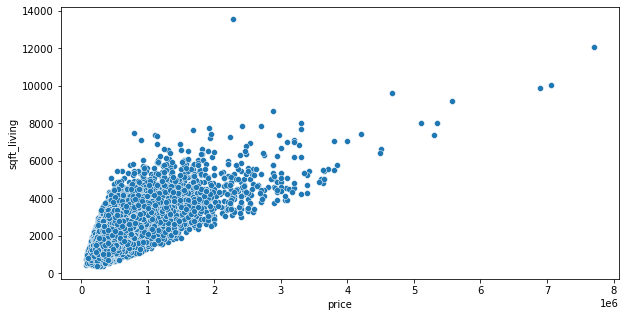

In [11]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

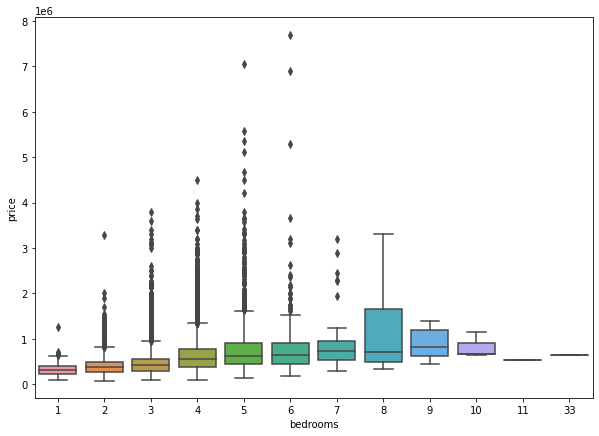

In [12]:
plt.figure(figsize = (10,7
                     ))
sns.boxplot(x='bedrooms', y = 'price', data = df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='lat'>

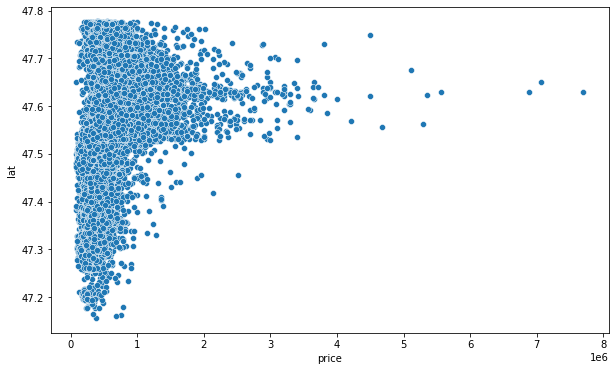

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='lat', data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

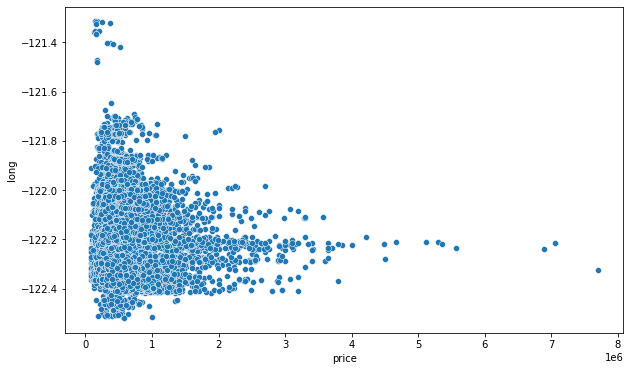

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='long', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

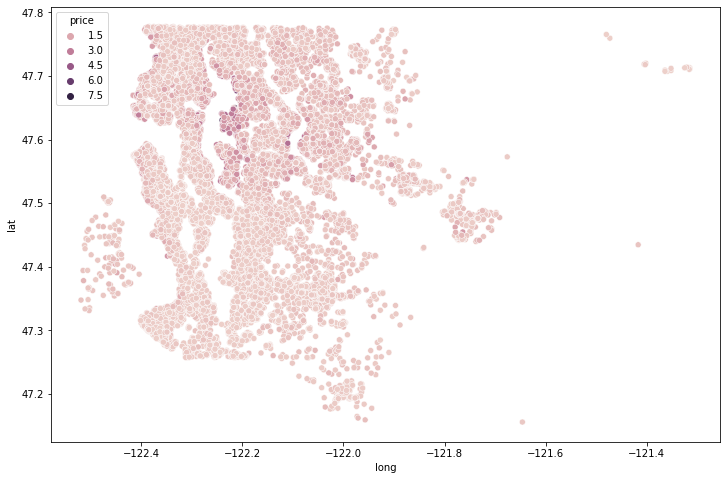

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [17]:
df.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [18]:
len(df)*0.01

215.97

In [19]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [20]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

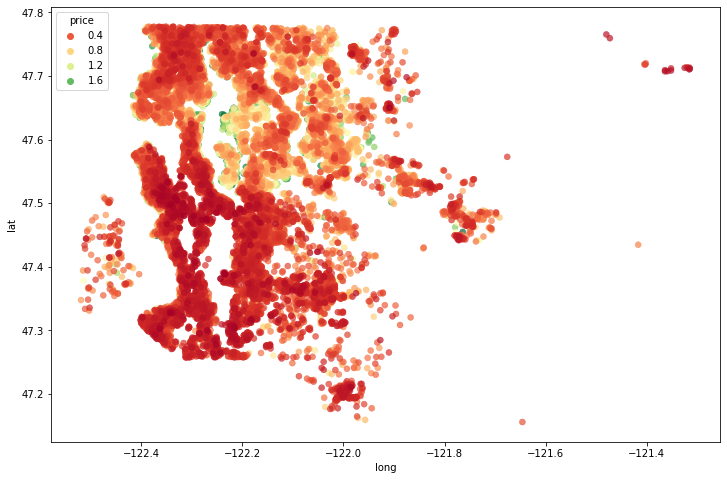

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor = None, alpha = 0.7, palette = 'RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

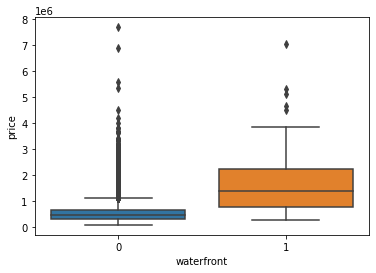

In [22]:
sns.boxplot(x = 'waterfront', y= 'price', data = df)

### Feature Engeering

In [23]:
df = df.drop('id', axis =1)

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [98]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [99]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

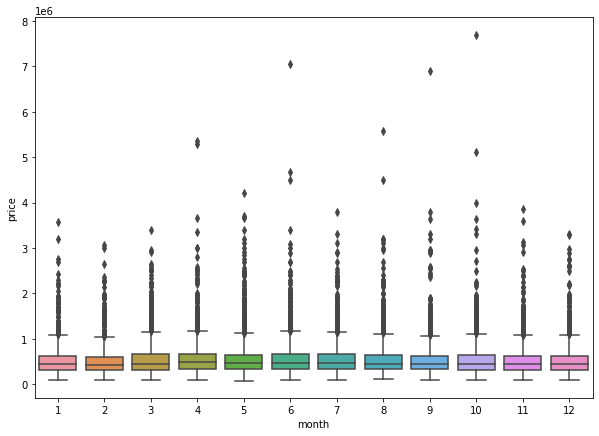

In [100]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'month', y='price', data = df)

<AxesSubplot:xlabel='month'>

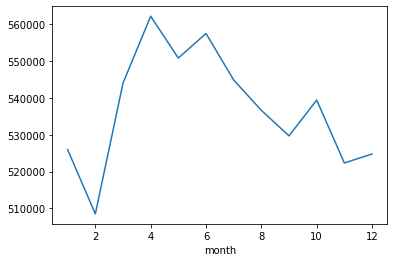

In [101]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

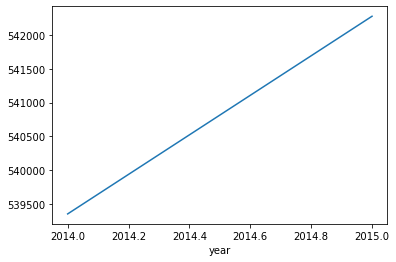

In [102]:
df.groupby('year').mean()['price'].plot()

In [103]:
df = df.drop('date',axis=1)

In [104]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [105]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [106]:
df = df.drop('zipcode', axis = 1)

In [107]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [108]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [109]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.transform(X_test)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
X_train.shape

(15117, 19)

In [118]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [119]:
model.fit(x = X_train, y = y_train, validation_data= (X_test, y_test), batch_size = 120, epochs = 400)

Epoch 1/400
126/126 [==============================] - 1s 4ms/step - loss: 430233845760.0000 - val_loss: 418872688640.0000
Epoch 2/400
126/126 [==============================] - 0s 3ms/step - loss: 428248399872.0000 - val_loss: 411961556992.0000
Epoch 3/400
126/126 [==============================] - 0s 3ms/step - loss: 400586571776.0000 - val_loss: 350339203072.0000
Epoch 4/400
126/126 [==============================] - 0s 3ms/step - loss: 279088758784.0000 - val_loss: 177254793216.0000
Epoch 5/400
126/126 [==============================] - 0s 3ms/step - loss: 127204466688.0000 - val_loss: 96571899904.0000
Epoch 6/400
126/126 [==============================] - 0s 4ms/step - loss: 98240159744.0000 - val_loss: 94042062848.0000
Epoch 7/400
126/126 [==============================] - 0s 3ms/step - loss: 96187752448.0000 - val_loss: 92245712896.0000
Epoch 8/400
126/126 [==============================] - 0s 3ms/step - loss: 94245822464.0000 - val_loss: 90414112768.0000
Epoch 9/400
126/126 [==

Epoch 135/400
126/126 [==============================] - 0s 3ms/step - loss: 32417228800.0000 - val_loss: 30875527168.0000
Epoch 136/400
126/126 [==============================] - 0s 3ms/step - loss: 32392677376.0000 - val_loss: 30822350848.0000
Epoch 137/400
126/126 [==============================] - 0s 3ms/step - loss: 32359653376.0000 - val_loss: 30864488448.0000
Epoch 138/400
126/126 [==============================] - 0s 3ms/step - loss: 32322304000.0000 - val_loss: 30783064064.0000
Epoch 139/400
126/126 [==============================] - 0s 3ms/step - loss: 32264687616.0000 - val_loss: 30718758912.0000
Epoch 140/400
126/126 [==============================] - 0s 3ms/step - loss: 32291872768.0000 - val_loss: 30718287872.0000
Epoch 141/400
126/126 [==============================] - 0s 3ms/step - loss: 32232155136.0000 - val_loss: 30657134592.0000
Epoch 142/400
126/126 [==============================] - 0s 3ms/step - loss: 32186664960.0000 - val_loss: 30739179520.0000
Epoch 143/400
12

126/126 [==============================] - 0s 3ms/step - loss: 30143358976.0000 - val_loss: 28212408320.0000
Epoch 268/400
126/126 [==============================] - 0s 3ms/step - loss: 30138146816.0000 - val_loss: 28256262144.0000
Epoch 269/400
126/126 [==============================] - 0s 3ms/step - loss: 30159290368.0000 - val_loss: 28163553280.0000
Epoch 270/400
126/126 [==============================] - 0s 3ms/step - loss: 30121900032.0000 - val_loss: 28124153856.0000
Epoch 271/400
126/126 [==============================] - 0s 3ms/step - loss: 30089263104.0000 - val_loss: 28203188224.0000
Epoch 272/400
126/126 [==============================] - 0s 3ms/step - loss: 30120509440.0000 - val_loss: 28101677056.0000
Epoch 273/400
126/126 [==============================] - 0s 3ms/step - loss: 30096164864.0000 - val_loss: 28109824000.0000
Epoch 274/400
126/126 [==============================] - 0s 3ms/step - loss: 30069927936.0000 - val_loss: 28071976960.0000
Epoch 275/400
126/126 [=======

126/126 [==============================] - 0s 3ms/step - loss: 28589307904.0000 - val_loss: 26236790784.0000
Epoch 400/400
126/126 [==============================] - 0s 3ms/step - loss: 28613103616.0000 - val_loss: 26292418560.0000


## Evaluation

In [120]:
model.history.history

{'loss': [430233845760.0,
  428248399872.0,
  400586571776.0,
  279088758784.0,
  127204466688.0,
  98240159744.0,
  96187752448.0,
  94245822464.0,
  92286181376.0,
  90261651456.0,
  88173084672.0,
  85979209728.0,
  83708215296.0,
  81310777344.0,
  78832771072.0,
  76161540096.0,
  73510690816.0,
  70705496064.0,
  67913617408.0,
  65189666816.0,
  62498832384.0,
  60022337536.0,
  57828147200.0,
  55865868288.0,
  54252863488.0,
  52884746240.0,
  51724165120.0,
  50806857728.0,
  49981853696.0,
  49190203392.0,
  48556949504.0,
  47994634240.0,
  47415382016.0,
  46920556544.0,
  46417158144.0,
  45966176256.0,
  45511684096.0,
  45116440576.0,
  44676288512.0,
  44319924224.0,
  43900317696.0,
  43508441088.0,
  43167981568.0,
  42776473600.0,
  42405179392.0,
  42027085824.0,
  41669476352.0,
  41287598080.0,
  40917860352.0,
  40603480064.0,
  40299327488.0,
  39983587328.0,
  39725486080.0,
  39468163072.0,
  39211495424.0,
  38936571904.0,
  38704562176.0,
  38482530304.0,
 

In [121]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

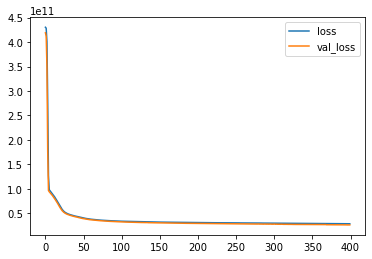

In [122]:
losses.plot()

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [124]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [125]:
predictions

array([[433006.4 ],
       [577750.1 ],
       [583589.06],
       ...,
       [399563.34],
       [571436.6 ],
       [662916.5 ]], dtype=float32)

In [126]:
mean_absolute_error(y_test, predictions)

99523.68764347029

In [127]:
mean_squared_error(y_test, predictions)

26292415075.611763

In [128]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predictions))

In [129]:
root_mean_squared_error

162149.36039223764

In [130]:
explained_variance_score(y_test, predictions)

0.8021693359538041

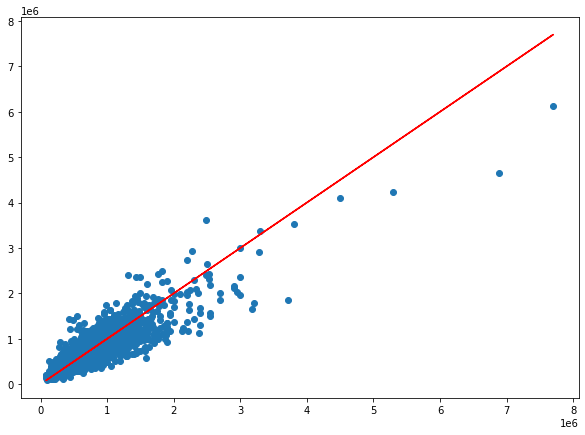

In [131]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [132]:
single_house = df.drop('price', axis = 1).iloc[0]

In [135]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [139]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [140]:
model.predict(single_house)

1/1 [==============================] - 0s 31ms/step


array([[276560.03]], dtype=float32)

In [142]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
